# 2.1 - Sweep

<img style="float: right" src="img/1-title.gif" width="600">

Sweeps sind eine beliebte Methode zur Messung der Übertragungsfunktion eines linearen Systems, da sie eine Reihe von positiven Eigenschaften aufweisen wie bspw. einen (einstellbaren) glatten Amplitudenfrequenzgang.

Das Thema der Sweeps wird in der Vorlesung in Thema 3: "Messung der Übertragungsfunktion und Impulsantworten" behandelt und das hier präsentierte Beispiel wird in der 6. Übungseinheit per Hand berechnet.

## Inhalt  
<table style="width:330px; border: 1px solid black; display: inline-block">
    <tr>
        <td style="text-align:right" width=64px><img src="img/TITLE-linear.png" style="float:left"></td>
        <td style="text-align:left" width=300px>
            <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#1'>
                1. Sweep mit konstanter Hüllkurve
            </a>
        </td>
    </tr>  
    <tr>
        <td style="text-align:right"><img src="img/TITLE-triang.png" style="float:left"></td>
        <td style="text-align:left" width=128px>
            <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#2'>
                2. Sweep mit Dreieck-Hüllkurve
            </a>
        </td>
    </tr>
    <tr>
        <td style="text-align:right"><img src="img/TITLE-Python.png" style="float:left"></td>
        <td style="text-align:left" width=128px>
            <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#3'>
                3. Realisierung mit Python-Modulen
            </a>
        </td>
    </tr>
</table>


---
<a id='1'></a><div><img src="img/TITLE-linear.png" style="float:left"><h2 style="position: relative; top: 6px; left: 6px">1. Sweep mit konstanter Hüllkurve</h2></div>

Ein Sweep $x(t)$ im Zeitbereich ist eine harmonische Schwingung mit zeitabhängigem Phasenargument $\varphi (t)$, dessen Momentanfrequenz $\omega (t)$ mit der Zeit monoton zu- oder abnimmt (weswegen er auch Gleitsinus genannt wird, in Abgrenzung zu Sinusschwingungen mit einer konstanten Phase) :
\begin{equation*}
x(t)=x_{0} \cdot \sin (\varphi (t))\; \; mit \; \; \omega (t)=\frac{\mathrm{d} \varphi (t)}{\mathrm{d} t}\; \; 
\rightarrow \; \;  x(t)=x_{0} \cdot \sin \left( \int \omega (t)dt + \varphi_{0} \right)
\end{equation*}  
In der Umgebung eines Zeitpunkts $t_{0}$ mit der _Momentanfrequenz_ $\omega _{0}$ nähert sich $x(t)$ einer Sinusfunktion mit der Frequenz $\omega _{0}$ an.

Zur Erzeugung eines Sweeps mit linearer Hüllkurve und linearer Frequenzänderung erhält man folgende Formel:

\begin{equation*}
x(t)=x_{0} \cdot \sin \left( \omega_{start} \cdot t + \frac{\omega_{end} - \omega_{start}}{2 \cdot T_s} \cdot t^2 \right)
\end{equation*}

---

Neben den schon bekannten Modulen `matplotlib`, `numpy`, `scipy` und `simpleaudio`, wird in diesem Notebook das Modul [`ipywidgets`](https://ipywidgets.readthedocs.io/en/stable/) eingeführt. Damit lassen sich Benutzeroberflächen (user interface / UI) einfügen, wie zum Beispiel Schieberegler, mit denen sich Variablenwerte einstellen lassen. Dieses Modul müssen sie wahrscheinlich noch über `pip install` installieren. Wenn Sie das getan haben, können Sie nun alle für dieses Modul benötigten Module importieren:

In [1]:
'''
Import externer Module
'''
# Lösung
import numpy as np
import simpleaudio as sa
import matplotlib.pyplot as plt
from scipy import fftpack, signal
from ipywidgets import interact_manual

Die Variablen für die Berechnung des linearen Sweeps sind: 
 - *fs_Hz*: Abtastfrequenz (für diese Aufgabe relativ beliebig),
 - *A*: Amplitude des Sweeps (für diese Aufgabe relativ beliebig),
 - *fStart_Hz*: Startfrequenz des Sweeps,
 - *fEnd_Hz*: Endfrequenz des Sweeps,
 - *T_s*: Dauer des Sweep.
 
Erstellen Sie zunächst eine Funktion "sweep_linear", die über die Eingabevariablen [`fs_Hz`, `fStart_lin_Hz`, `fEnd_lin_Hz`, `T_s` und `A`] die zwei Ausgabevariablen [`t_s` (Array mit Abtastzeitpunkten) und `sweep` (Array mit Werten des linearen Sweeps an den Zeitpunkten von `t_s`)] erzeugt.

In [2]:
'''
Definition der Funktion sweep_linear
'''
# Lösung
def sweep_linear(fs_Hz, fStart_lin_Hz, fEnd_lin_Hz, T_s, A):
    t_s = np.linspace(0, T_s, int(fs_Hz*T_s))
    wstart_rad_per_s = fStart_lin_Hz * 2 * np.pi
    wend_rad_per_s = fEnd_lin_Hz * 2 * np.pi
    sweep = A * np.sin(wstart_rad_per_s * t_s + (wend_rad_per_s-wstart_rad_per_s) * (t_s ** 2) / (2 * T_s))
    return t_s, sweep

Nun initialisieren Sie die Variablen für die Berechnung des Sweeps. Die Werte der Variablen sollen dabei wie folgt sein:
 - *fs_Hz*: 16 kHz,
 - *A*: 1,
 - *fStart_Hz*: 50 Hz,
 - *fEnd_Hz*: 400 Hz,
 - *T_s*: 4 s.
 
Führen Sie mit diesen Variablen die Funktion "sweep_linear" aus und lassen Sie sich diese graphisch darstellen:

In [3]:
'''
Variableninitialisierung und Erzeugen der Zeitfunktion des Sweeps
'''
# Lösung
# Initialisierung der Variablen
fs_Hz = 16e3
amplitude = 1
fStart_Hz = 50
fEnd_Hz = 400
T_s = 4

# Zeitbereich
time_s, sweep_lin = sweep_linear(fs_Hz, fStart_Hz, fEnd_Hz, T_s, amplitude)


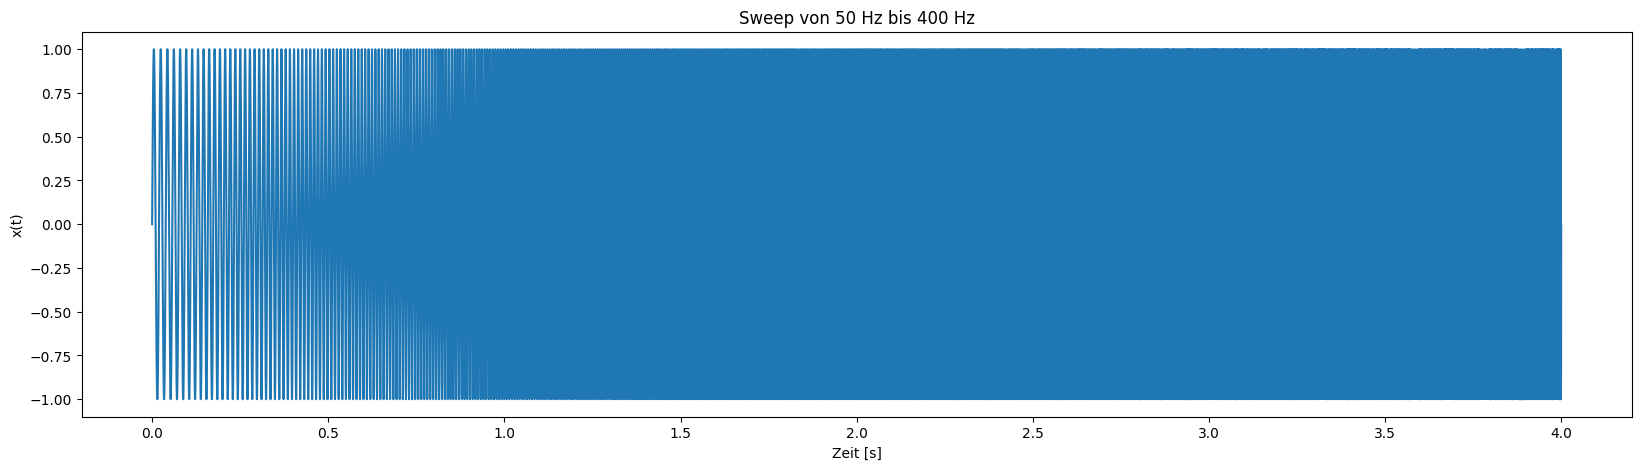

In [4]:
# Graphische Darstellung des Sweeps
plt.title('Sweep von %d Hz bis %d Hz' %(fStart_Hz, fEnd_Hz))
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(time_s, sweep_lin)
plt.gcf().set_size_inches(20, 5)
plt.show()

Nun können Sie sich den erzeugten Sweep auch anhören! Erstellen Sie dafür eine Funktion "play_audio", die mittels `simpleaudio` Arrays ausgibt (wie in Kapitel 1.3 eingeführt). Nutzen Sie dann die neu definierte Funktion, um sich den Sweep auszugeben. <br>(Achtung: Das Signal ist sehr laut!)

In [5]:
'''
Definition der Funktion play_audio
'''
# Lösung
def play_audio(sweep_signal):
    sound = (sweep_signal*(2**15-1)/np.max(np.abs(sweep_signal))).astype(np.int16)
    play_obj = sa.play_buffer(sound, 1, 2, int(fs_Hz))
    play_obj.wait_done()

In [6]:
'''
Audioausgabe
'''
#Lösung
play_audio(sweep_lin)

Es ist zudem sehr interessant, wie das Signal im Frequenzbereich aussieht. Wenden Sie deswegen die in der folgenden Funktion "fft_sweep" definiert Fast-Fourier-Transformation auf den Sweep an:

In [7]:
'''
Definition der Funktion fft_sweep
'''
def fft_sweep(sweep, fs_Hz):
    N = sweep.size # Länge von FFT
    f_Hz = np.linspace(0, fs_Hz/2, int(N/2)) # Frequenzbereich
    sweep_fft = fftpack.fft(sweep, N)
    sweep_fft_plot = np.abs(sweep_fft[:len(f_Hz)]) / int(N/2)
    return f_Hz, sweep_fft_plot

In [8]:
'''
Erzeugen des Frequenzgangs des Sweeps
'''
# Lösung
# Anwendung der FFT
f_Hz, sweep_fft_plot = fft_sweep(sweep_lin, fs_Hz)


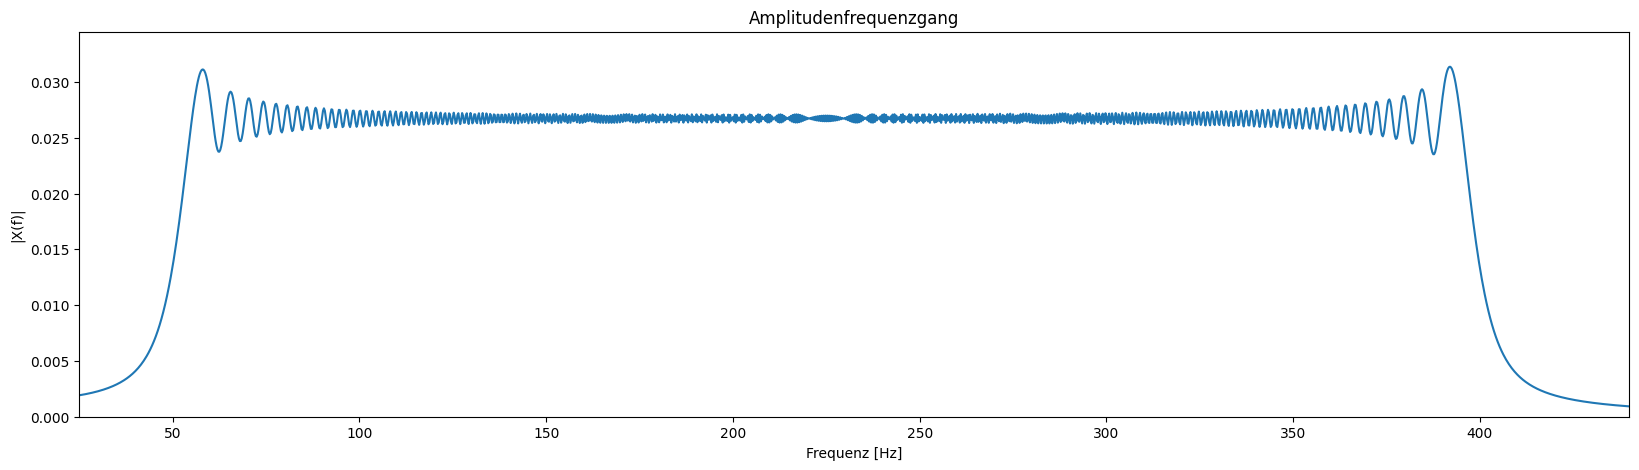

In [9]:
# Graphische Darstellung
plt.title('Amplitudenfrequenzgang')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('|X(f)|') 
plt.plot(f_Hz, sweep_fft_plot)
plt.axis([fStart_Hz*0.5, fEnd_Hz*1.1, 0, np.max(sweep_fft_plot)*1.1])
plt.gcf().set_size_inches(20, 5)
plt.show()

Der Frequenzgang zeigt an den Rändern des Frequenzbands eine starke Welligkeit auf. Um diese zu entfernen, kann die Frequenz mittels Ein- und Ausblenden geglättet werden. Dies soll hier mit einem Tukey-Fenster aus dem Objekt [`signal.get_window()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html) umgesetzt werden.

In [10]:
'''
Erzeugen des Tukey-Fensters
'''
# Lösung
window = signal.get_window(('tukey', 0.2), len(sweep_lin))


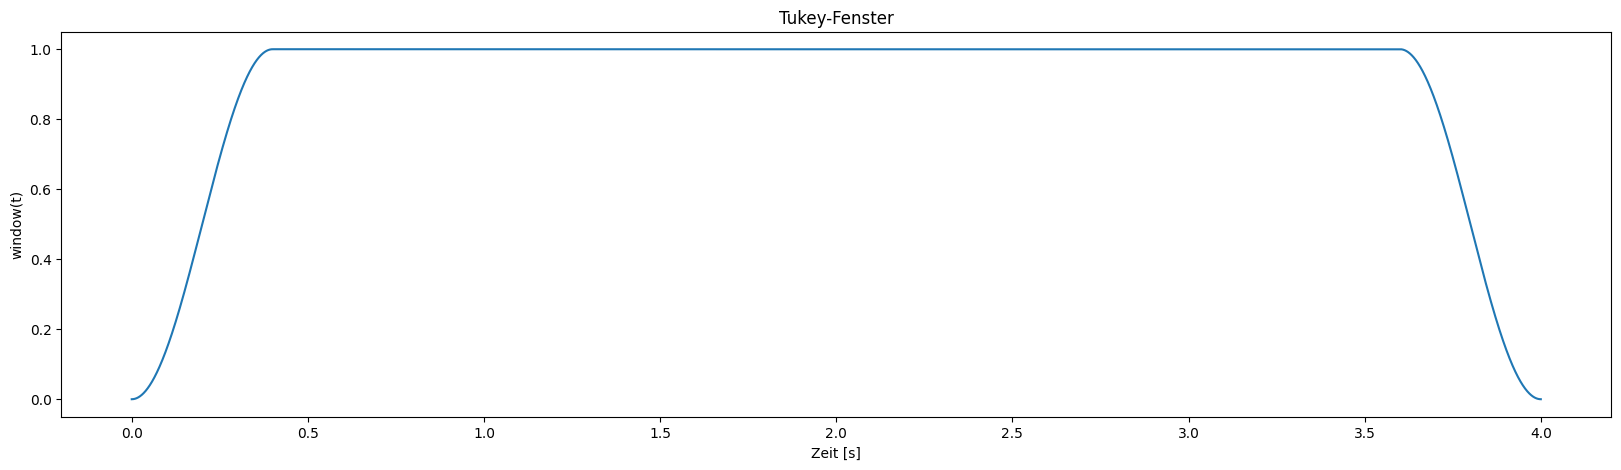

In [11]:
plt.title('Tukey-Fenster')
plt.xlabel('Zeit [s]') 
plt.ylabel('window(t)') 
plt.plot(time_s, window)
plt.gcf().set_size_inches(20, 5)
plt.show()

In [12]:
'''
Fensterung des Sweep-Signals
'''
# Lösung
# Zeitbereich
sweep_win = sweep_lin * window

# Frequenzbereich
f_Hz, sweep_win_fft_plot = fft_sweep(sweep_win, fs_Hz)


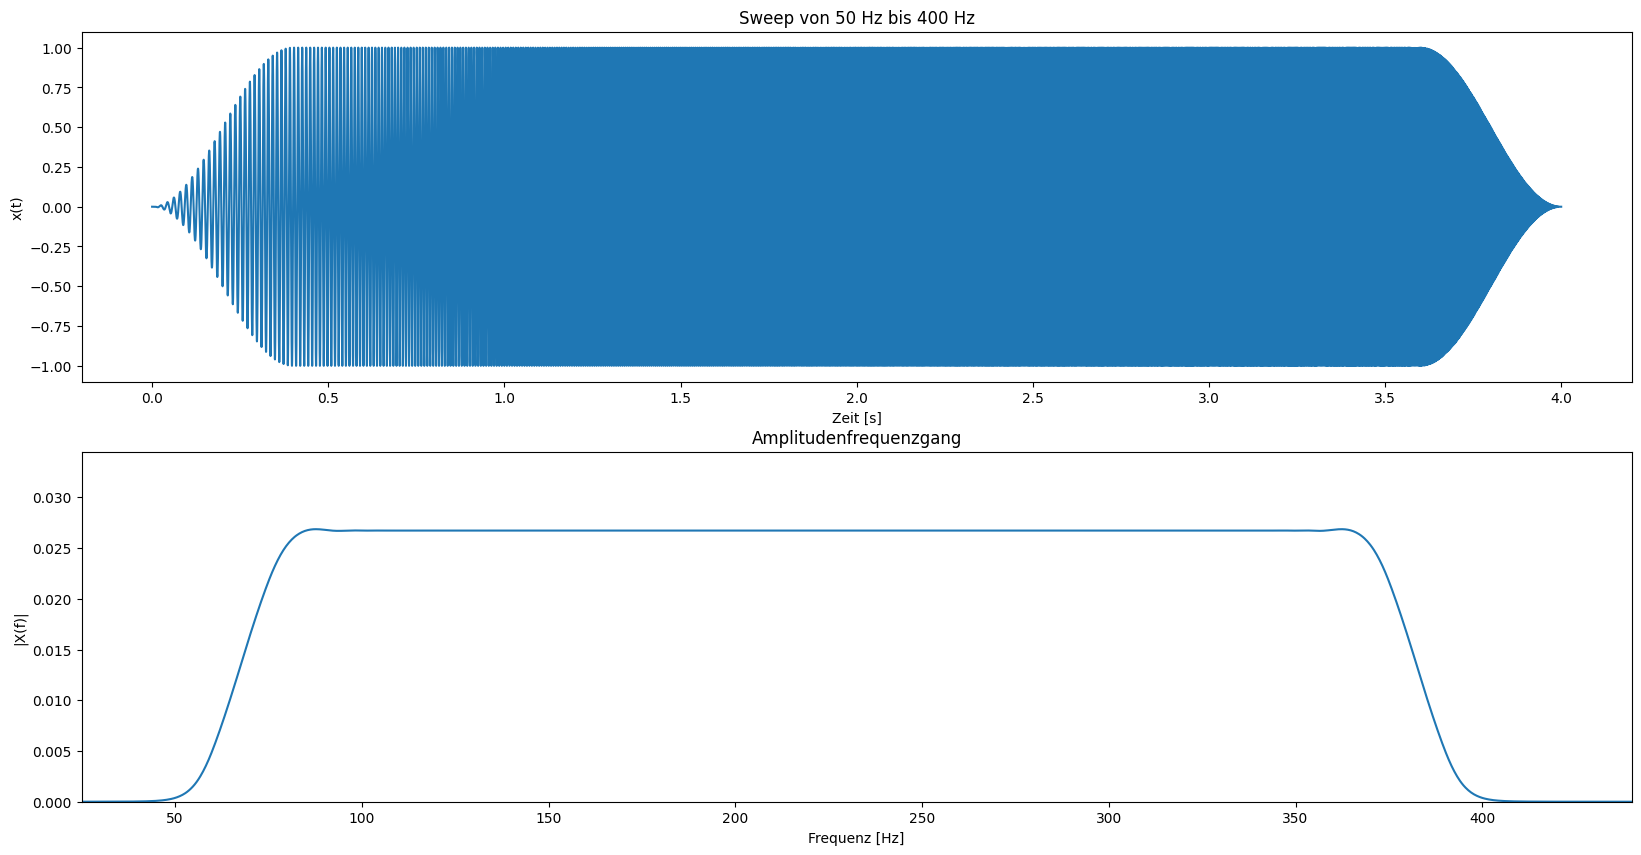

In [13]:
# Graphische Darstellung
plt.subplot(211)
plt.title('Sweep von %d Hz bis %d Hz' %(fStart_Hz, fEnd_Hz))
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(time_s, sweep_win)

plt.subplot(212)
plt.title('Amplitudenfrequenzgang')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('|X(f)|') 
plt.plot(f_Hz, sweep_win_fft_plot)
plt.axis([fStart_Hz*0.5, fEnd_Hz*1.1, 0, np.max(sweep_fft_plot)*1.1])

plt.gcf().set_size_inches(20, 10)
plt.show()

In [14]:
'''
Audioausgabe
'''
# Lösung
play_audio(sweep_win)

Durch die Fensterung sollte die Welligkeit im Frequenzbereich verringert worden sein. Nur verringert sich dadurch auch die Amplitude der äußeren Frequenzen.

---

Um sich die Veränderungen von Fenstern oder Frequenzen interaktiv anschauen zu können, wird nun das Modul [`ipywidgets`](https://ipywidgets.readthedocs.io/en/stable/index.html) genutzt. Durch dieses können Variablen verändert werden und mittels Drop-Down-Menüs oder Häckchen-Kästen die Ausgabe verändert werden. Probieren Sie es einfach aus. Sie müssen dafür noch in dem folgenden Code Ihre definierten Funktionen einfügen:

In [15]:
'''
Initialisierung fester Variablen
'''
fs_Hz = 16e3
amplitude = 1

In [16]:
'''
Interaktive Sweepdarstellung
'''
# Lösung
@interact_manual(T_s_i=(0.1, 5, 0.1), fStart_Hz_i=(10, 5000, 10), fEnd_Hz_i=(10, 5000, 10), windowing_i = False, window_type_i=[('tukey', 1), ('triang', 2)], win_alpha_i=(0, 1, 0.01), output_sound_i = True)
def interactive_linear_sweep(T_s_i=2, fStart_Hz_i=10, fEnd_Hz_i=100, windowing_i=False, window_type_i='tukey', win_alpha_i=0.2, output_sound_i=True):
    # Erzeugung des Sweeps
    time_s, sweep = sweep_linear(fs_Hz, fStart_Hz_i, fEnd_Hz_i, T_s_i, amplitude)

    # Optionales Fenstern des Sweeps
    if windowing_i == True:
        if window_type_i == 1:
            window = signal.get_window(('tukey', win_alpha_i), len(sweep))
        elif window_type_i == 2:
            window = signal.get_window('triang', len(sweep))
        else:
            window = signal.get_window('boxcar', len(sweep))
        sweep = sweep * window
    
    # Graphische Darstellung des Zeitbereichs
    plt.title('Sweep von %d Hz zu %d Hz' %(fStart_Hz_i, fEnd_Hz_i))
    plt.xlabel('Zeit [s]') 
    plt.ylabel('x(t)') 
    plt.plot(time_s, sweep)
    plt.gcf().set_size_inches(20, 5)
    plt.show()
    
    # FFT des Sweeps
    f_Hz, sweep_fft_plot = fft_sweep(sweep, fs_Hz)

    # Graphische Darstellung des Frequenzbereichs
    plt.title('Amplitudenfrequenzgang')
    plt.xlabel('Frequenz [Hz]') 
    plt.ylabel('|X(f)|') 
    plt.plot(f_Hz, sweep_fft_plot)
    if fStart_Hz_i <= fEnd_Hz_i:
        plt.axis([fStart_Hz_i*0.5, fEnd_Hz_i*1.2, 0, np.max(sweep_fft_plot)*1.1])
    else:
        plt.axis([fEnd_Hz_i*0.5, fStart_Hz_i*1.2, 0, np.max(sweep_fft_plot)*1.1])
    
    plt.gcf().set_size_inches(20, 5)
    plt.show()
    
    
    # Optionale Audioausgabe
    if output_sound_i == True:
        play_audio(sweep)

interactive(children=(FloatSlider(value=2.0, description='T_s_i', max=5.0, min=0.1), IntSlider(value=10, descr…

<a id='2'></a><div><img src="img/TITLE-triang.png" style="float:left"><h2 style="position: relative; top: 6px; left: 6px">2. Sweep mit Dreieck-Hüllkurve</h2></div>

Im Nachfolgenden soll der in Übung 6.1 händisch berechnete Sweep implementiert und visualisiert werden. Dabei soll der Sweep im Frequenzbereich eine konstante Amplitude in seinem Band erhalten. Um das Frequenzverhalten eines linearen Sweeps zu betrachten, welches mit einem Dreieck gefenstert wurde, kann in der vorherigen Zelle betrachtet werden, wenn man das Fenster 'triang' wählt.

---

Zunächst werden die Grundparameter definiert. Die Start- und Endfrequenz $f_{start} = 200 \ Hz$ und $f_{end} = 1000 \ Hz$ bzw. $\omega_{start}$ und $\omega_{end}$ sowie die notwendige Abtastfrequenz $f_s = 16 \ kHz$ festgelegt:

In [17]:
'''
Grundparameter definieren:
'''
# Lösung
fs_Hz = 16e3     # Abtastfrequenz (für diese Aufgabe relativ beliebig)
dt_s = 1/fs_Hz   # Zeitintervall
fStart_Hz = 200  # Startfrequenz [Hz]
fEnd_Hz = 1000   # Endfrequenz [Hz]
wStart_rad_per_s = fStart_Hz * 2 * np.pi  # Startfrequenz [rad/s]
wEnd_rad_per_s = fEnd_Hz * 2 * np.pi  # Endfrequenz [rad/s]
wm_rad_per_s = (wStart_rad_per_s + wEnd_rad_per_s) / 2  # Mittenfrequenz [rad/s]

Anschließend werden die Funktionen für die Phasenwinkel $\varphi_1(t)$ und $\varphi_2(t)$ definiert. Nutzen Sie dafür die berechneten Formeln aus 6.1 c):

In [18]:
'''
Definition der Funktion calculatePhi1
'''
# Lösung
def calculatePhi1(t_s, wStart_rad_per_s, k, T_s):
    phi = k*t_s**4/(3*T_s**2) + wStart_rad_per_s*t_s
    return phi

In [19]:
'''
Definition der Funktion calculatePhi2
'''
# Lösung
def calculatePhi2(t_s, wStart_rad_per_s, k, T_s):
    phi = k * t_s**4 / (3 * T_s**2) - 4*k / (3*T_s) * t_s**3 \
    + 2*k * t_s**2 - k*T_s*t_s + wStart_rad_per_s*t_s \
    + 7*k/48 * T_s**2 - wStart_rad_per_s*T_s/2
    return phi

Durch die Diskontinuität in der Einhüllenden ($a(t)$) müssen in diesem Spezialfall zusätzliche Bedingungen erfüllt werden, damit die Phase an der Übergangssstelle kontinuierlich verläuft. Zum einen muss der Sweep-Phasenwinkel $\varphi(t)$ an der Stelle $T/2$ gleich sein:
\begin{equation}
\sin\left(\varphi_1\left(\frac{T}{2}\right)\right) = \sin\left(\varphi_2\left(\frac{T}{2}\right)\right) 
\end{equation}

Substituiert man hier die berechneten Gleichungen aus der Übung für $\varphi_1(T/2)$ und $\varphi_2(T/2)$ ergibt sich die erste Bedingung
\begin{equation}
\sin\left(\frac{T\cdot(7\omega_1 + \omega_2)}{16}\right) = \sin\left(0\right) = 0.
\end{equation}

Zum anderen muss auch die Ableitung des Sweep-Phasenwinkels, $\frac{\mathrm{d}\varphi(t)}{\mathrm{d}t}$ gleich sein, d.h. aus der ersten Bedingung folgt (innere Ableitung nicht vergessen):

\begin{align}
&\cos\left(\frac{T\cdot(7\omega_1 + \omega_2)}{16}\right)\cdot \left(\frac{\omega_1 + \omega_2}{2}\right) = \cos\left(0\right)\cdot \left(\frac{\omega_1 + \omega_2}{2}\right) = 1 \\
&\Leftrightarrow \cos\left(\frac{T\cdot(7\omega_1 + \omega_2)}{16}\right) = 1.
\end{align}

Beide Gleichungen sind erfüllt, wenn das Argument ein Vielfaches von $2\pi$ ist. Damit kann die Sweepdauer $T$ explizit durch

\begin{equation}
\frac{T}{16}\left(\omega_1 + \omega_2\right) = 2\pi\cdot n,\qquad n=0,1,2,3,\dots
\end{equation}

berechnet werden und ist durch $n\in \mathbb{N}$ nicht komplett frei wählbar.
Dieser Zusammenhang für die Periode $T$ soll nun in der nachfolgenden Funktion definiert:

In [20]:
'''
Definition der Funktion calculatePhi2
'''
# Lösung
def calculatePeriod(wStart_rad_per_s, wEnd_rad_per_s, n_periods):
    T_s = 2*n_periods*np.pi*16 / (7*wStart_rad_per_s + wEnd_rad_per_s)  
    return T_s

Zudem muss der Faktor k aus 6.1.b) berechnet werden. Dafür wird nun auch eine Funktion definiert:

In [21]:
'''
Definition der Funktion calculatek
'''
# Lösung
def calculatek(wStart_rad_per_s, wEnd_rad_per_s, T_s):
    k = 3/T_s * (wEnd_rad_per_s - wStart_rad_per_s)  
    return k

Zu guter Letzt werden noch die beiden Funktionen für die Berechnung der Amplitudenmodulaton $a(t)$ für beide Hälften definiert. Nutzen Sie dafür die Formeln aus 6.1 a):

In [22]:
'''
Definition der Amplituden-Funktionen
'''
# Lösung
def calculateAmplitude1(t_s, T_s):
    a = 2/T_s*t_s
    return a

def calculateAmplitude2(t_s, T_s):
    a = -2/T_s*(t_s-T_s)
    return a

Nun berechnen wir zuerst die Sweepdauer, indem wir die Funktion "calculatePeriod" verwenden und dafür die Variable n_periods auf 300 festsetzen (der Wert ist hier egal). Daraus lässt sich zudem die Konstante k aus 6.1. b) bestimmen:

In [23]:
'''
Berechnung von T_s und k
'''
# Lösung
n_periods = 300;
# Sweepdauer T berechnen in Abhängigkeit von ganzen Perioden 2*pi*n:
T_s = calculatePeriod(wStart_rad_per_s, wEnd_rad_per_s, n_periods)  # die Dauer des Sweeps
print("Sweepdauer: {} Sekunden.\n".format(T_s))

# Konstante k:
k = calculatek(wStart_rad_per_s, wEnd_rad_per_s, T_s)

Sweepdauer: 2.0 Sekunden.



Jetzt können wir den Sweep damit berechnen und plotten:

In [24]:
'''
Implementierung des Sweeps nach Übung 6.1
'''
# Lösung
# Laufvariable t definieren:
t1_s = np.linspace(0, T_s/2, int(fs_Hz*T_s/2))
t2_s = np.linspace(T_s/2+dt_s, T_s, int(fs_Hz*T_s/2-1))

# Phasenwinkel für beide Abschnitte:
phi1_rad = calculatePhi1(t1_s, wStart_rad_per_s, k, T_s)
phi2_rad = calculatePhi2(t2_s, wStart_rad_per_s, k, T_s)

# Einhüllende für beide Abschnitte:
a1 = calculateAmplitude1(t1_s, T_s)
a2 = calculateAmplitude2(t2_s, T_s)

# Vollständigen Sweep zusammensetzen:
sweep1 = a1 * np.sin(phi1_rad)
sweep2 = a2 * np.sin(phi2_rad)
t_s = np.append(t1_s, t2_s)        
sweep = np.append(sweep1, sweep2)


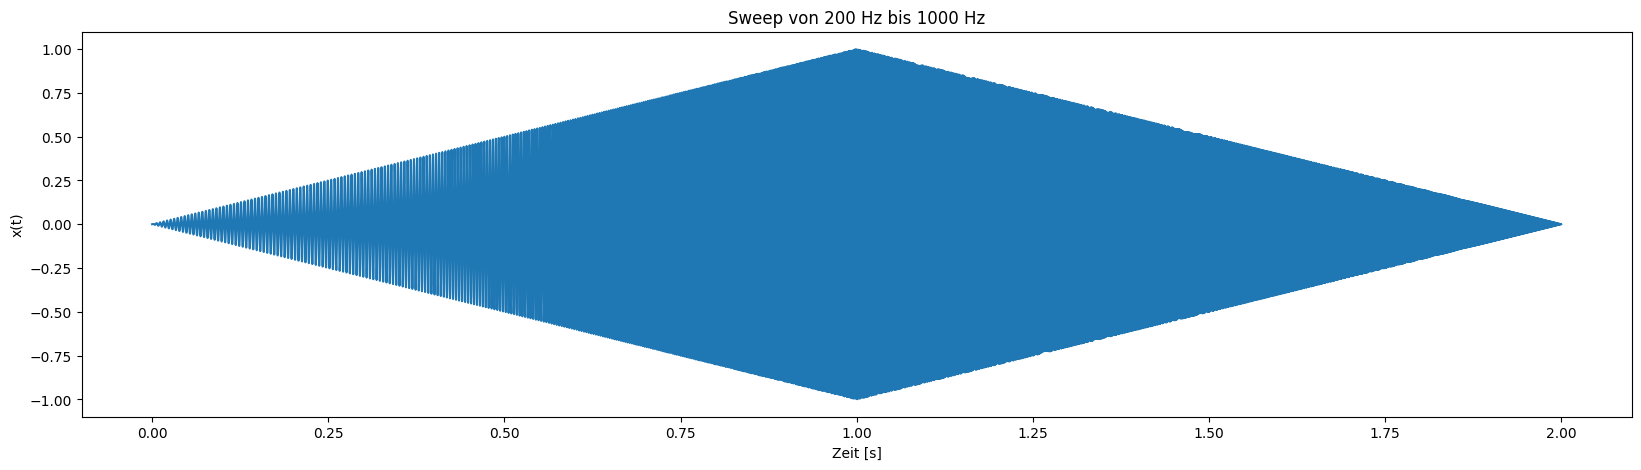

In [25]:
# Plot
plt.title('Sweep von %d Hz bis %d Hz' %(fStart_Hz, fEnd_Hz))
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_s, sweep)
plt.gcf().set_size_inches(20, 5)
plt.show()

Um sicherzustellen, dass der Sweep tatsächlich das (annähernd) glatte Spektrum über den definierten Frequenzbereich von $f_{start}$ bis $f_{end}$ besitzt, wird der Amplitudenfrequenzgang $|X(k)|$ über die FFT berechnet. Dazu kann die im ersten Teil definierte Funktion "fft_sweep" verwendet werden:

In [26]:
'''
Aufgabe: Spektrum des Sweeps berechnen
'''
# Lösung
f_Hz, sweep_fft_plot = fft_sweep(sweep, fs_Hz)


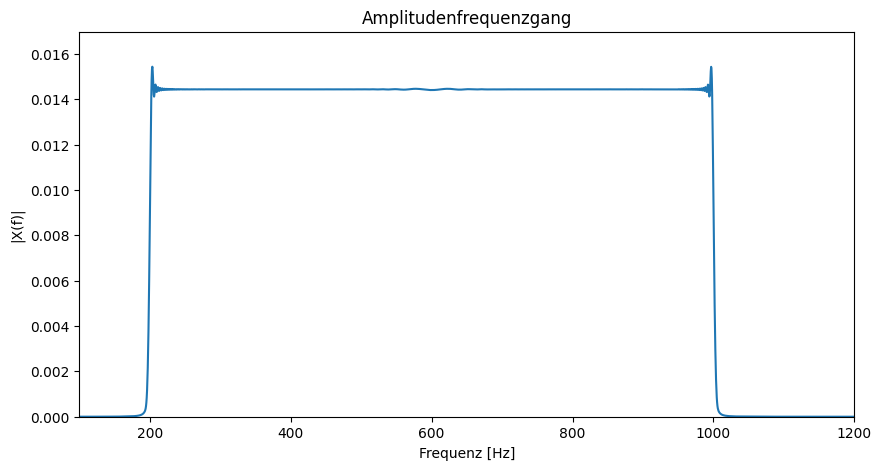

In [27]:
# Plot 
plt.title('Amplitudenfrequenzgang')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('|X(f)|') 
plt.plot(f_Hz, sweep_fft_plot)
plt.axis([fStart_Hz*0.5, fEnd_Hz*1.2, 0, np.max(sweep_fft_plot)*1.1])
plt.gcf().set_size_inches(10, 5)
plt.show()

Abspielen des Sweepssignal $x(t)$ ergibt das charakteristische Sweepgeräusch. Hierzu können Sie auch die aus dem ersten Part definierte Funktion "playaudio()" verwenden:

In [28]:
'''
Aufgabe: Sweep abspielen
'''
# Lösung
play_audio(sweep)

----
Zum Schluss wollen wir uns das Ergebnis noch einmal als interaktives Modul anschauen. Dazu wird wieder die Funktion `interact` aus dem Modul `ipywidgets` verwendet:

In [29]:
'''
Initialisierung fester Variablen
'''
fs_Hz = 16e3
dt_s = 1/fs_Hz

In [30]:
'''
Interaktive Sweepdarstellung
'''
# Lösung
@interact_manual(n_periods_i=(1, 1000, 1), fStart_Hz_i=(10, 5000, 10), fEnd_Hz_i=(10, 5000, 10), output_sound_i = True)
def interactive_rect_sweep(n_periods_i=300, fStart_Hz_i=200, fEnd_Hz_i=1000, output_sound_i=True):
    
    
    # Berechnung der Koeffizienten
    wStart_rad_per_s_i = fStart_Hz_i * 2 * np.pi  # Startfrequenz [rad/s]
    wEnd_rad_per_s_i = fEnd_Hz_i * 2 * np.pi  # Endfrequenz [rad/s]
    T_s_i = calculatePeriod(wStart_rad_per_s_i, wEnd_rad_per_s_i, n_periods_i)
    k_i = calculatek(wStart_rad_per_s_i, wEnd_rad_per_s_i, T_s_i)

    # Laufvariable t definieren:
    t1_s_i = np.linspace(0, T_s_i/2, int(fs_Hz*T_s_i/2))
    t2_s_i = np.linspace(T_s_i/2+dt_s, T_s_i, int(fs_Hz*T_s_i/2-1))
    
    # Phasenwinkel für beide Abschnitte:
    phi1_rad_i = calculatePhi1(t1_s_i, wStart_rad_per_s_i, k_i, T_s_i)
    phi2_rad_i = calculatePhi2(t2_s_i, wStart_rad_per_s_i, k_i, T_s_i)   
    
    # Einhüllende für beide Abschnitte:
    a1_i = calculateAmplitude1(t1_s_i, T_s_i)
    a2_i = calculateAmplitude2(t2_s_i, T_s_i)

    # Vollständigen Sweep zusammensetzen:
    sweep1_i = a1_i * np.sin(phi1_rad_i)
    sweep2_i = a2_i * np.sin(phi2_rad_i)
    t_s_i = np.append(t1_s_i, t2_s_i)        
    sweep = np.append(sweep1_i, sweep2_i)
    
    # Graphische Darstellung des Zeitbereichs
    plt.title('Sweep von %d Hz zu %d Hz' %(fStart_Hz_i, fEnd_Hz_i))
    plt.xlabel('Zeit [s]') 
    plt.ylabel('x(t)') 
    plt.plot(t_s_i, sweep)
    plt.gcf().set_size_inches(20, 5)
    plt.show()
    
    # FFT des Sweeps
    f_Hz, sweep_fft_plot = fft_sweep(sweep, fs_Hz)

    # Graphische Darstellung des Frequenzbereichs
    plt.title('Amplitudenfrequenzgang')
    plt.xlabel('Frequenz [Hz]') 
    plt.ylabel('|X(f)|') 
    plt.plot(f_Hz, sweep_fft_plot)
    if fStart_Hz_i <= fEnd_Hz_i:
        plt.axis([fStart_Hz_i*0.5, fEnd_Hz_i*1.2, 0, np.max(sweep_fft_plot)*1.1])
    else:
        plt.axis([fEnd_Hz_i*0.5, fStart_Hz_i*1.2, 0, np.max(sweep_fft_plot)*1.1])
    
    plt.gcf().set_size_inches(20, 5)
    plt.show()
    
    
    # Optionale Audioausgabe
    if output_sound_i == True:
        play_audio(sweep)

interactive(children=(IntSlider(value=300, description='n_periods_i', max=1000, min=1), IntSlider(value=200, d…

----

<a id='3'></a><div><img src="img/TITLE-Python.png" style="float:left"><h2 style="position: relative; top: 6px; left: 6px">3. Realisierung mit Python-Modulen</h2></div>

Im Modul scipy ist die Funktion [signal.chirp()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.chirp.html) als Frequenzgesteuerter Kosinusgenerator vorhanden, dadurch können Sweeps deutlich einfacher erzeugt werden. Zudem kann mit dem Modul [signal.spectrogram()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html) das Signal in einem Spektrogramm betrachtet werden.

In [31]:
'''
Erzeugen des Sweep mittels signal.chirp()
'''
from scipy.signal import chirp, spectrogram

# Sweep-Parameter definieren:
fsChirp_Hz = 16000
TChirp_s = 3
tChirp_s = np.linspace(0, TChirp_s, TChirp_s*fsChirp_Hz, endpoint=False)
chirpStartFreq_Hz = 200
chirpEndFreq_Hz = 1000

# Sweep und dessen Amplitudenfrequeuzgang berechnen:
xSweep = chirp(tChirp_s, chirpStartFreq_Hz, TChirp_s, chirpEndFreq_Hz, 'linear')
fChirp_Hz, tChirpSg_s, XSweep_f = spectrogram(xSweep, fsChirp_Hz, nperseg=250)


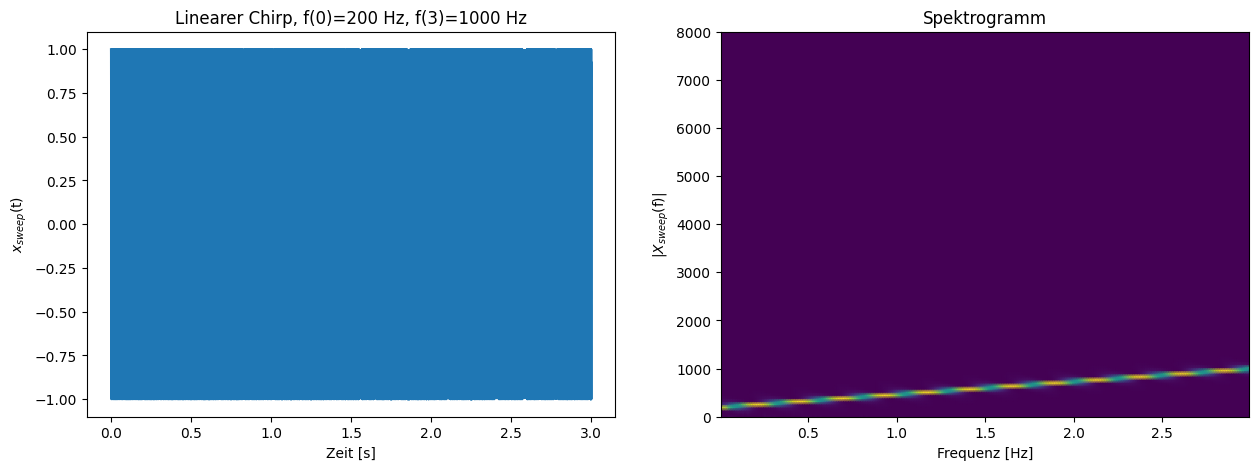

In [32]:
# Plot
plt.subplot(121)
plt.title('Linearer Chirp, f(0)=%d Hz, f(%d)=%d Hz' %(chirpStartFreq_Hz, TChirp_s, chirpEndFreq_Hz))
plt.xlabel('Zeit [s]') 
plt.ylabel('$x_{sweep}$(t)') 
plt.plot(tChirp_s, xSweep)
plt.subplot(122)
plt.title('Spektrogramm')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('|$X_{sweep}$(f)|') 
plt.pcolormesh(tChirpSg_s, fChirp_Hz, XSweep_f,shading='gouraud')
plt.gcf().set_size_inches(15, 5)
plt.show()

In [33]:
'''
Aufgabe: Sweep abspielen
'''
# Werte in 16-Bit-Daten konvertieren
sound = (xSweep*(2**15-1)/np.max(np.abs(xSweep))).astype(np.int16)

# Abspielen
play_obj = sa.play_buffer(sound, 1, 2, int(fsChirp_Hz))
play_obj.wait_done()

Die Verwendung eines Spektrogramms statt eines einfachen Spektrums zur Darstellung des Frequenzbereiches (in diesem Falle in zusätzlicher Abhängigkeit von der Zeit) wird im nächsten Notebook noch ausführlich behandelt.

---

### References

1. Titelbild von [wikimedia](https://commons.wikimedia.org/wiki/File:Chirp_animation.gif?uselang=de)  
2. [Sweep (Signalverarbeitung)](https://de.wikipedia.org/wiki/Sweep_(Signalverarbeitung))  
3. [Sinusoidal Sweep Signals](https://learn.digilentinc.com/Documents/132)  
4. [Sine Sweep](https://theaudioprogrammer.com/signal-analysis-ii-linear-vs-logarithmic-sine-sweep/)  
---
<div>Notebook erstellt von Arne-Lukas Fietkau, Yifei Li  und <a href="mailto:christoph.wagner@tu-dresden.de?Subject=Frage%20zu%20Jupyter%20Notebook%201.2%20IIR%20Filterentwurf" target="_top">Christoph Wagner</a></div>